In [ ]:
# Install necessary modules
!pip install pycaret

In [ ]:
!pip install streamlit

In [1]:
# Import necessary modules
from pycaret.classification import *
import streamlit as st
import pandas as pd
import numpy as np
from pycaret.datasets import get_data

In [2]:
# Load data
credit_card_df = pd.read_csv('card_transdata.csv')
credit_card_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
len(credit_card_df[credit_card_df['fraud']==0])

651492

In [4]:
len(credit_card_df[credit_card_df['fraud']==1])

62469

In [5]:
credit_card_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,713962.000000,713962.000000,713962.000000,713962.000000,713962.000000,713962.000000,713962.000000,713961.000000
mean,26.647188,5.025508,1.825082,0.881446,0.350185,0.100888,0.650501,0.087496
std,64.959982,26.425048,2.802562,0.323263,0.477028,0.301180,0.476812,0.282561
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878924,0.296020,0.475405,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.970818,0.997570,0.997868,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.779341,3.352054,2.098411,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713962 entries, 0 to 713961
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              713962 non-null  float64
 1   distance_from_last_transaction  713962 non-null  float64
 2   ratio_to_median_purchase_price  713962 non-null  float64
 3   repeat_retailer                 713962 non-null  float64
 4   used_chip                       713962 non-null  float64
 5   used_pin_number                 713962 non-null  float64
 6   online_order                    713962 non-null  float64
 7   fraud                           713961 non-null  float64
dtypes: float64(8)
memory usage: 43.6 MB


In [7]:
credit_card = setup(credit_card_df, target = 'fraud', use_gpu = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,fraud
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(713962, 8)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
2022-09-26 21:43:20.378 INFO    logs: create_model_container: 0
INFO:logs:master_model_container: 0
2022-09-26 21:43:20.384 INFO    logs: master_model_container: 0
INFO:logs:display_container: 1
2022-09-26 21:43:20.389 INFO    logs: display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='fraud',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer

In [8]:
credit_card_best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.9999,0.9998,0.9999,0.9999,0.9998,0.9998,1.110
rf,Random Forest Classifier,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.9999,32.794
ada,Ada Boost Classifier,0.9997,1.0000,0.9989,0.9981,0.9985,0.9984,0.9984,22.386
gbc,Gradient Boosting Classifier,0.9996,1.0000,0.9961,0.9994,0.9977,0.9975,0.9975,90.555
et,Extra Trees Classifier,0.9994,1.0000,0.9939,0.9991,0.9965,0.9962,0.9962,18.427
lightgbm,Light Gradient Boosting Machine,0.9987,1.0000,0.9943,0.9909,0.9926,0.9919,0.9919,3.026
knn,K Neighbors Classifier,0.9800,0.9930,0.9039,0.8716,0.8874,0.8764,0.8766,6.350
svm,SVM - Linear Kernel,0.9612,0.0000,0.6926,0.8447,0.7480,0.7278,0.7388,9.074
lr,Logistic Regression,0.9588,0.9672,0.5997,0.8936,0.7177,0.6964,0.7125,8.234
qda,Quadratic Discriminant Analysis,0.9582,0.9664,0.6689,0.8197,0.7366,0.7142,0.7186,0.452


INFO:logs:create_model_container: 14
2022-09-26 22:17:02.468 INFO    logs: create_model_container: 14
INFO:logs:master_model_container: 14
2022-09-26 22:17:02.473 INFO    logs: master_model_container: 14
INFO:logs:display_container: 2
2022-09-26 22:17:02.479 INFO    logs: display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
2022-09-26 22:17:02.482 INFO    logs: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
   

In [9]:
credit_card_dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.9999,0.9998,1.0000,0.9999,0.9999,0.9999
1,1.0000,1.0000,1.0000,0.9998,0.9999,0.9999,0.9999
2,1.0000,0.9998,0.9995,1.0000,0.9998,0.9997,0.9997
3,1.0000,0.9999,0.9998,1.0000,0.9999,0.9999,0.9999
4,1.0000,0.9998,0.9995,1.0000,0.9998,0.9997,0.9997
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9999,0.9999,0.9998,0.9995,0.9997,0.9996,0.9996
7,1.0000,0.9999,0.9998,1.0000,0.9999,0.9999,0.9999
8,1.0000,0.9999,0.9998,1.0000,0.9999,0.9999,0.9999


INFO:logs:create_model_container: 15
2022-09-26 22:17:16.424 INFO    logs: create_model_container: 15
INFO:logs:master_model_container: 15
2022-09-26 22:17:16.432 INFO    logs: master_model_container: 15
INFO:logs:display_container: 3
2022-09-26 22:17:16.439 INFO    logs: display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
2022-09-26 22:17:16.447 INFO    logs: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
   

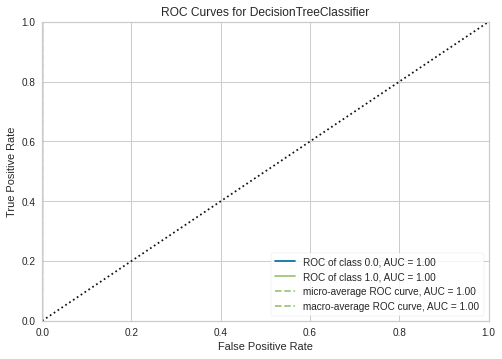

INFO:logs:Visual Rendered Successfully
2022-09-26 22:17:17.048 INFO    logs: Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
2022-09-26 22:17:17.156 INFO    logs: plot_model() succesfully completed......................................


In [10]:
plot_model(credit_card_dt)

In [11]:
save_model(credit_card_dt, 'credit_card_dt_deployment_model')

INFO:logs:Initializing save_model()
2022-09-26 22:17:17.176 INFO    logs: Initializing save_model()
INFO:logs:save_model(model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), model_name=credit_card_dt_deployment_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='fraud',
    

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='fraud',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                        